### Import Libraries

The first step is to import the necessary libraries that are essential for data processing, machine learning, and visualization:

*   **pandas** is used to load and manipulate datasets.
    
*   **train\_test\_split** from sklearn is used to split the data into training and testing sets.
    
*   **LabelEncoder** from sklearn is used to encode categorical variables into numerical values.
    
*   **classification\_report** from sklearn is used to evaluate the model's performance.
    
*   **numpy** is used for numerical operations, such as matrix multiplication.
    
*   **matplotlib** is used for visualizing the data and decision boundaries.

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

### Load and Preprocess Data

In this step, the dataset is loaded into a **pandas DataFrame** from the CSV file Employee2.csv. The categorical columns in the dataset (Education, City, Gender, EverBenched) are encoded using **LabelEncoder**. This process transforms the string categories into numerical values, as machine learning models typically require numerical data. The features (X) are defined as all columns except the target variable (LeaveOrNot), and the target variable (y) is extracted from the LeaveOrNot column. Afterward, the data is split into training (80%) and testing (20%) sets using **train\_test\_split**.


In [56]:
# Load dataset
data = pd.read_csv('Employee2.csv')
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [57]:
# Preprocessing
label_encoder = LabelEncoder()

# Encode categorical columns
data['Education'] = label_encoder.fit_transform(data['Education'])
data['City'] = label_encoder.fit_transform(data['City'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['EverBenched'] = label_encoder.fit_transform(data['EverBenched'])

# Define features and target
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize Parameters

This section initializes the model parameters:

*   The number of features is obtained from the training set (X\_train).
    
*   The weight vector w is initialized to zero. This vector will be optimized during the training process.
    
*   The bias term b is initialized to zero.
    
*   A **learning rate** of 1e-5 is chosen to ensure stable updates to the weights during the gradient descent process.
    
*   The model will run for a total of 1000 iterations to optimize the weights and bias.

In [59]:
# Initialize parameters
n_features = X_train.shape[1]
w = np.zeros(n_features)
b = 0

# Learning rate
learning_rate = 1e-5

# Number of iterations
num_iterations = 1000

### Sigmoid Function

The **sigmoid function** is used as the activation function in logistic regression. The sigmoid function maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability. Mathematically, the sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:

*   z is the linear combination of input features and weights: z=Xw+bz = Xw + b.
    

In [60]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Loss Function

The **binary cross-entropy loss function** (also known as log loss) is used to measure the error between the predicted probabilities and the true labels. The formula for binary cross-entropy is:

$$
L = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(y_{pred_i}) + (1 - y_i) \log(1 - y_{pred_i}) \right]
$$

Where:

- \( m \) is the number of samples.
- \( y_i \) is the true label for sample \( i \).
- \( y_{pred_i} \) is the predicted probability for sample \( i \).

The values of \( y_{pred} \) are clipped to a small value (1e-10) to avoid computing the logarithm of zero, which would result in undefined values.


In [61]:
def compute_loss(y, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Clip values to avoid log(0)
    m = y.shape[0]
    loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

### Gradient Descent

The **gradient descent algorithm** is used to optimize the weights (\( w \)) and bias (\( b \)) by minimizing the loss function. The optimization process is done iteratively:

- **Forward Pass**: The predicted probabilities are computed using the sigmoid function.
    
- **Gradients**: The gradients of the loss function with respect to the weights and bias are computed:
    
    - $$ \frac{\partial L}{\partial w} = \frac{1}{m} X^T (y_{pred} - y) $$
        
    - $$ \frac{\partial L}{\partial b} = \frac{1}{m} \sum (y_{pred} - y) $$
        
- Update the parameters:

    - $$ w = w - \alpha \frac{\partial L}{\partial w} $$

    - $$ b = b - \alpha \frac{\partial L}{\partial b} $$

This process continues for a set number of iterations (1000 in this case) until the model converges to an optimal solution.


In [62]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    for i in range(num_iterations):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        
        # Clip predictions to avoid log(0) errors
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        
        # Compute gradients
        dw = 1/m * np.dot(X.T, (y_pred - y))
        db = 1/m * np.sum(y_pred - y)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Print loss every 100 iterations
        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Iteration {i}: Loss = {loss}")
    return w, b

### Training the Model

This step trains the logistic regression model by running the gradient descent algorithm. During the training, the weights and bias are optimized to minimize the loss function, and the loss is printed every 100 iterations to monitor the training process.


In [63]:
# Train the model
w, b = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

Iteration 0: Loss = 0.6931471805599453
Iteration 100: Loss = 1.212329015166258
Iteration 200: Loss = 6.074955455713619
Iteration 300: Loss = 5.978516388097213
Iteration 400: Loss = 1.2122750794422168
Iteration 500: Loss = 6.0749003325245
Iteration 600: Loss = 5.9784627097907395
Iteration 700: Loss = 1.2122215320559862
Iteration 800: Loss = 6.074844500050373
Iteration 900: Loss = 5.978409417767005


### Prediction

Once the model is trained, it can make predictions on new data. The **predict function** computes the linear combination of the input features and weights, applies the sigmoid function to get probabilities, and then classifies the output as 1 if the probability is greater than or equal to 0.5 and as 0 otherwise.

### Model Evaluation

The **classification\_report** function from sklearn is used to evaluate the model's performance. It calculates several metrics such as **precision**, **recall**, **F1-score**, and **accuracy** for each class. These metrics provide insights into how well the model is performing, particularly in terms of identifying the positive and negative classes.


In [64]:
# Make predictions
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return np.where(y_pred >= 0.5, 1, 0)

y_pred = predict(X_test, w, b)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       610
           1       0.00      0.00      0.00       321

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.43      0.66      0.52       931



C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokulan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting the Decision Boundary

The **plot\_decision\_boundary function** visualizes the decision boundary created by the logistic regression model. The decision boundary separates the feature space into regions corresponding to each class (0 or 1). By plotting the points and the boundary, we can visually assess how well the model separates the classes based on the input features.

The decision boundary is computed over a mesh grid of values spanning the feature space. The model’s predictions are computed for each point in the grid and used to create a contour plot that represents the boundary between the two classes.


In [65]:
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### Feature Importance Plot

This section would display a **bar plot** of feature importance, showing how each feature contributes to predicting employee retention (the target variable). Although this code assumes the existence of feature\_importance, typically feature importance is calculated either through model coefficients (for linear models) or other methods like **permutation importance**.

This rich text provides an overview of each part of the code, explaining the key concepts behind the machine learning process, the math involved, and how each component contributes to the model's training and evaluation.

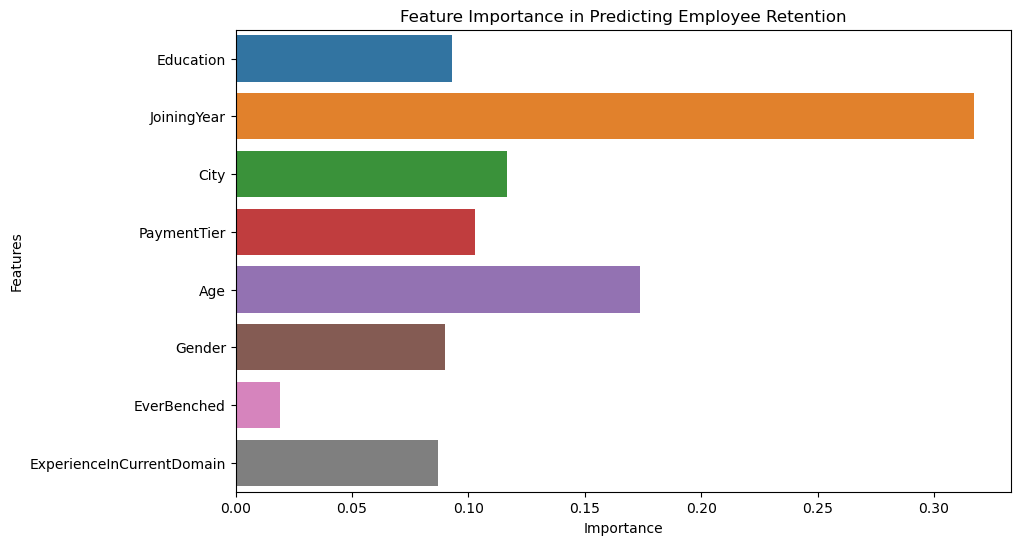

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance in Predicting Employee Retention')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
